#Import necessary libraries

#Customer Churn Analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Importing Dataset from github

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')    #raw link of github dataset
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#Exploratory Data Analysis(EDA)

In [8]:
df.shape   #checking the dimension of data

(7043, 21)

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [11]:
df.dtypes   #datatype of all the columns

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.isnull().sum()   #sum of all the null values in each columns

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum().sum()   #checking the sum of null values in whole dataset...no null values present

0

In [15]:
#the total charges column has the datatype as object instead of float which is wrong....it should be float 64

#Plotting a heatmap

<AxesSubplot:>

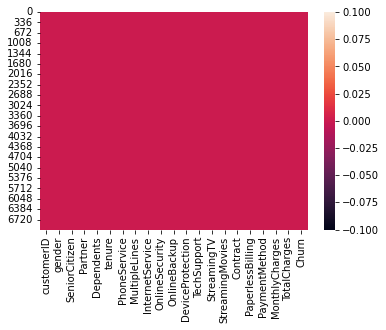

In [16]:
sns.heatmap(df.isnull())   #single colour heatmap as no null values are present 

In [17]:
df['TotalCharges'].unique()   #will give the list of unique values in the column

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [18]:
df['TotalCharges'].nunique()    #number of unique values in the column

6531

In [19]:
df['SeniorCitizen'].unique() #0 and 1 as unique values

array([0, 1], dtype=int64)

In [20]:
df['SeniorCitizen'].nunique()

2

In [21]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [22]:
#checking the value counts of unique values in each column...value_counts will give unique values and their number of presence at the same time

for i in df.columns:
    print(df[i].value_counts())
    print('\n')  #new line

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

#We can see that in 11 places in 'Totalcharges' column there is blank or void data. Keep in mind that void data is different from null data. Dtype of void data is object that's why the column was showing the object datatype.

#Now let's handle the void spaces in 'TotalCharges' column

In [23]:
#checking the space in TotalCharges column
df.loc[df['TotalCharges']==" "]   #loc checks by the column name and iloc checks by the index number of the column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#We can see that in 11 rows its showing blank values not null values. Now lets replace it with some values

In [24]:
df["TotalCharges"]=df["TotalCharges"].replace(" ", np.nan)
df.head(490)   #now in row 488 we can see nan instead of blank value in total charges column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,7971-HLVXI,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,No
486,9094-AZPHK,Female,0,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,1415,No
487,3649-JPUGY,Male,0,No,No,72,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No


In [25]:
df['TotalCharges'].value_counts()   #now we can see that in front of 11 there are no blank values 

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [26]:
df.isnull().sum()   #now we can see that there are 11 null values in totalcharges column and no blank spaces

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
df['TotalCharges']=df['TotalCharges'].astype(float)  #changing the dtype from object to float
df['TotalCharges'].dtype

dtype('float64')

#Now that we have changed the blank values to null values we can handle the null values. Now replacing the NaN values by mean as its a continuous data. If it was a categorical data we can use mode to fill the NaN values.

In [28]:
df['TotalCharges'].mean()

2283.3004408418697

In [29]:
np.mean(df['TotalCharges'])

2283.3004408418697

In [30]:
df.iloc[488,:]   #488th row for all the columns as it has nan value

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [31]:
print("The mean of the total charges column is:",df['TotalCharges'].mean())

The mean of the total charges column is: 2283.3004408418697


In [32]:
#filling null values in total charges with mean value

df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [33]:
#now check the null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

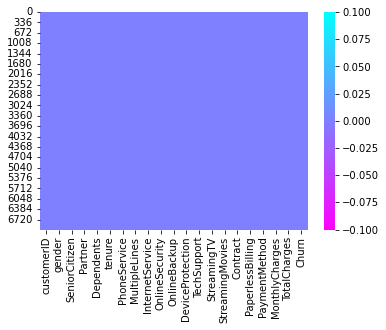

In [34]:
sns.heatmap(df.isnull(),cmap="cool_r")   #cool_r is the colour

In [35]:
#Seperating Numerical and categorical columns

categorical_col=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:", categorical_col)
print('\n')

numerical_col=[]
for i in df.columns:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:", numerical_col)
print("\n")

Categorical columns are: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical columns are: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']




In [36]:
#checking number of unique values in each column

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [37]:
df.nunique().to_frame("Number of unique values")

,Number of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


#now drpping the customer id as it has all unique values that cannot be analysed and not useful

In [38]:
df.drop("customerID",axis=1,inplace=True)  #inplace=true so that the changes are made in the original df

In [39]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [40]:
#checking uniques in churn column

df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#i.e. 1869 people have churned

#Describing the dataset

In [42]:
#statistical summary of numerical values

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [43]:
#if mean>median its right skewed i.e. in seniorcitizen,tenure,totalcharges
#if mean<median its left skewed i.e. in monthlycharges
#max value is very high than the 75% data i.e. outliers are present

#Data Visualization

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


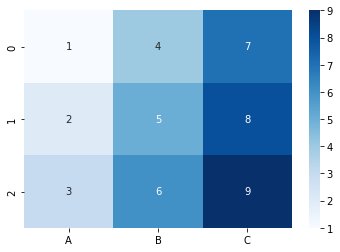

In [44]:
import seaborn as sns
import pandas as pd

# create a sample DataFrame
data = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

# create a heatmap
sns.heatmap(data,annot=True,cmap='Blues')
data

### Univariate analysis

In [45]:
#Visualize the number of churned customers

No     5174
Yes    1869
Name: Churn, dtype: int64


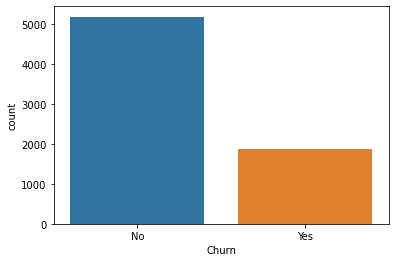

In [46]:
churn_datamap=sns.countplot(df["Churn"],data=df)
print(df["Churn"].value_counts())

#it shows that 73% people have not churned

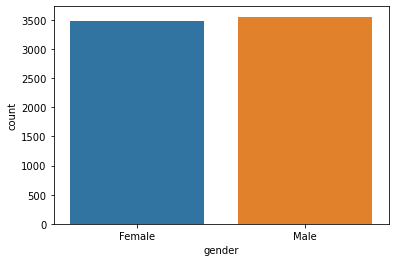

Male      3555
Female    3488
Name: gender, dtype: int64


In [47]:
gender=sns.countplot(df["gender"],data=df)
plt.show()
print(df["gender"].value_counts())

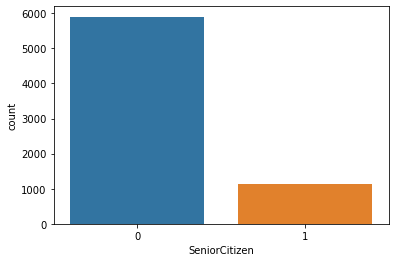

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


In [48]:
sc=sns.countplot(df["SeniorCitizen"],data=df)
plt.show()
print(df["SeniorCitizen"].value_counts())

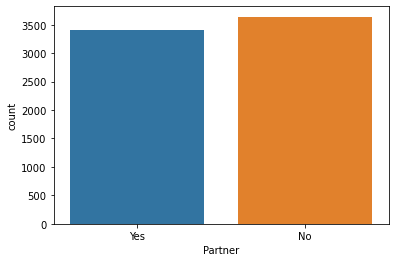

No     3641
Yes    3402
Name: Partner, dtype: int64


In [49]:
par=sns.countplot(df["Partner"],data=df)
plt.show()
print(df["Partner"].value_counts())

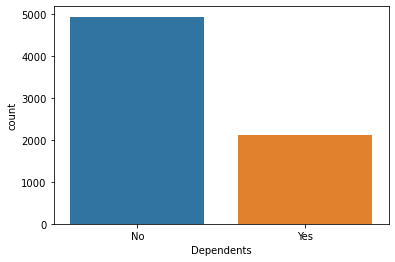

No     4933
Yes    2110
Name: Dependents, dtype: int64


In [50]:
sc=sns.countplot(df["Dependents"],data=df)
plt.show()
print(df["Dependents"].value_counts())

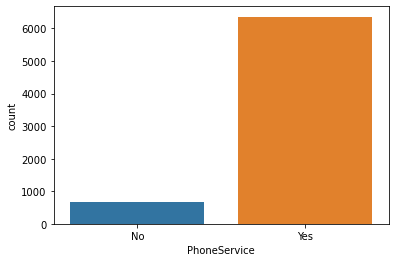

Yes    6361
No      682
Name: PhoneService, dtype: int64


In [51]:
sc=sns.countplot(df["PhoneService"],data=df)
plt.show()
print(df["PhoneService"].value_counts())

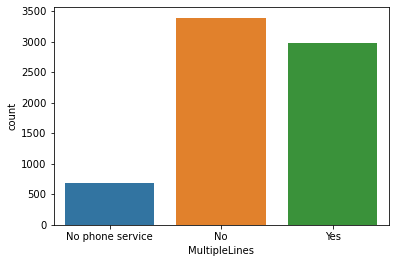

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


In [52]:
sc=sns.countplot(df["MultipleLines"],data=df)
plt.show()
print(df["MultipleLines"].value_counts())

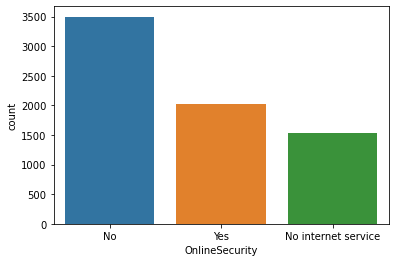

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


In [53]:
sc=sns.countplot(df["OnlineSecurity"],data=df)
plt.show()
print(df["OnlineSecurity"].value_counts())

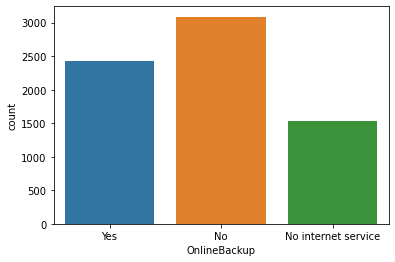

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


In [54]:
sc=sns.countplot(df["OnlineBackup"],data=df)
plt.show()
print(df["OnlineBackup"].value_counts())

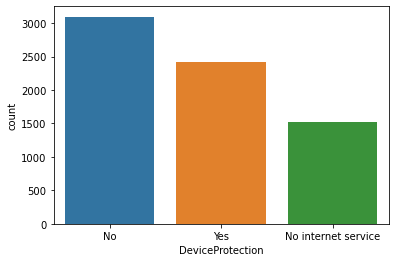

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


In [55]:
sc=sns.countplot(df["DeviceProtection"],data=df)
plt.show()
print(df["DeviceProtection"].value_counts())

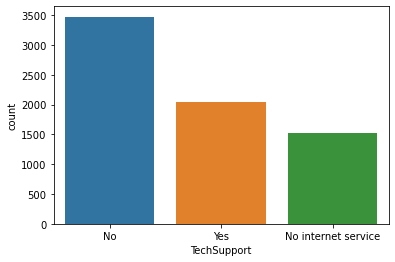

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


In [56]:
sc=sns.countplot(df["TechSupport"],data=df)
plt.show()
print(df["TechSupport"].value_counts())

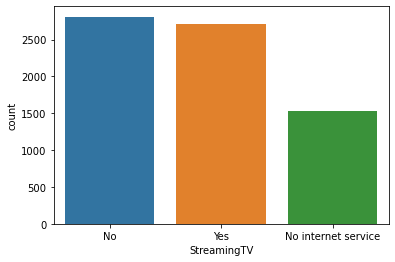

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


In [57]:
sc=sns.countplot(df["StreamingTV"],data=df)
plt.show()
print(df["StreamingTV"].value_counts())

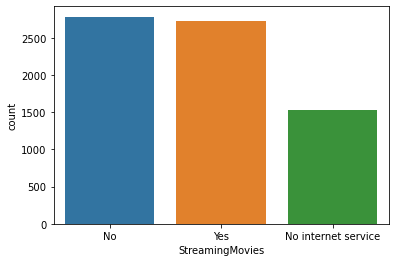

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


In [58]:
sc=sns.countplot(df["StreamingMovies"],data=df)
plt.show()
print(df["StreamingMovies"].value_counts())    

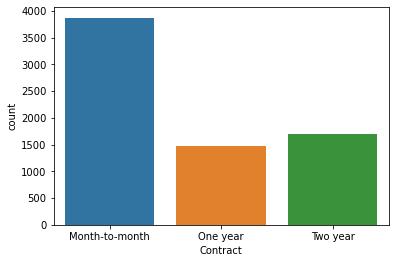

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


In [59]:
sc=sns.countplot(df["Contract"],data=df)
plt.show()
print(df["Contract"].value_counts())    

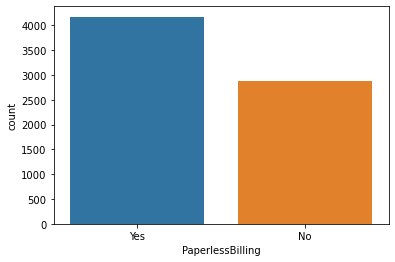

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


In [60]:
sc=sns.countplot(df["PaperlessBilling"],data=df)
plt.show()
print(df["PaperlessBilling"].value_counts()) 

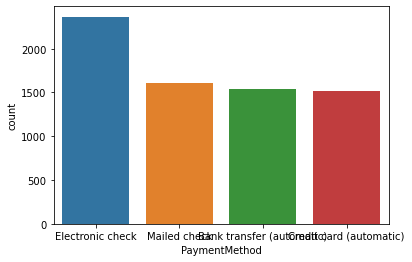

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [61]:
sc=sns.countplot(df["PaymentMethod"],data=df)
plt.show()
print(df["PaymentMethod"].value_counts()) 

#Let's check how the data has been distributed in the remaining columns with the help of distplot where there is continuous data and lot of unique values so the countplot is not helpful. Countplot was used where there was categorical data.

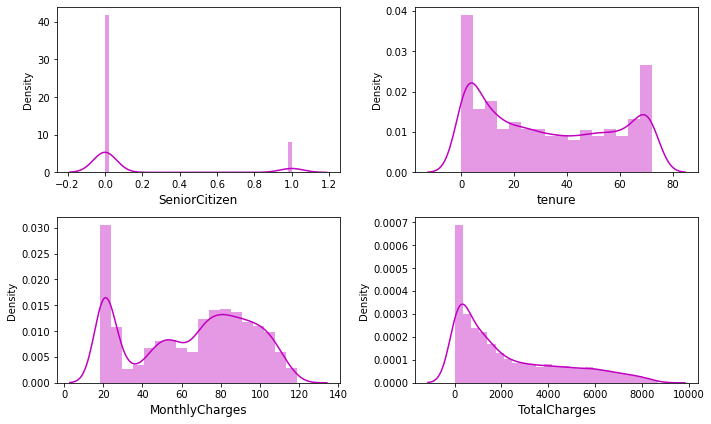

In [62]:
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)   #2,2 is the grid of 2 rows and 2 columns...can be 1,4 as well
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Bivariate Analysis

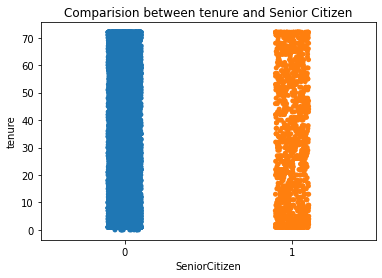

In [63]:
#where we take into consideration 2 columns
#comparision of tenure and senior citizen


plt.title("Comparision between tenure and Senior Citizen")
sns.stripplot(x="SeniorCitizen",y="tenure",data=df)
plt.show()

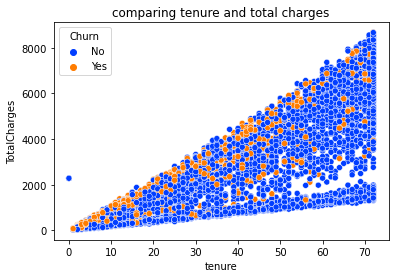

In [64]:
#comparing tenure and total charges

plt.title("comparing tenure and total charges")
sns.scatterplot(x='tenure', y='TotalCharges', data=df,hue='Churn',palette='bright')   #hue is to add a third variable
plt.show()

#here we can see a strong linear relation between tenure tenure and total charges

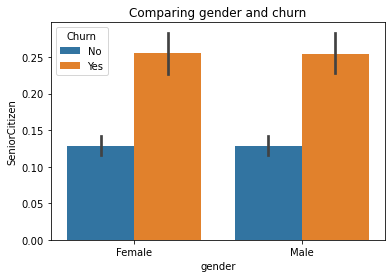

In [65]:
#comparing gender and senior citizen on the basis of churn

plt.title("Comparing gender and churn")
sns.barplot(x="gender",y="SeniorCitizen",data=df,hue='Churn')
plt.show()

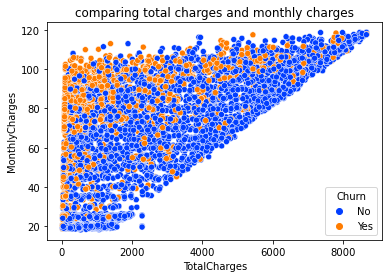

In [66]:
#comparing total charges and monthly charges

plt.title("comparing total charges and monthly charges")
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data=df,hue='Churn',palette='bright')
plt.show()

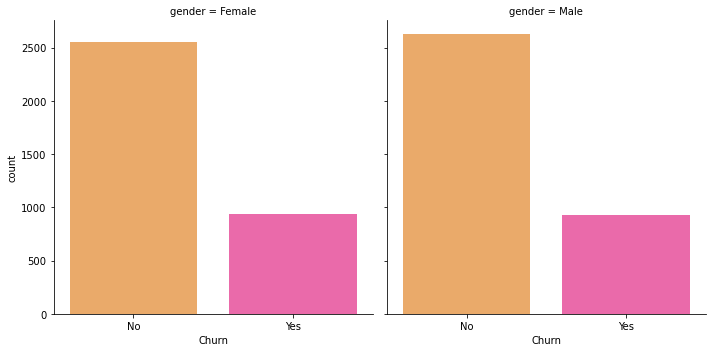

In [67]:
#comparing churn level and gender...catplot is categorical plot

sns.catplot(x='Churn',col='gender',data=df,kind='count',palette='spring_r')  #col is columns i.e. column1 is female and other is male

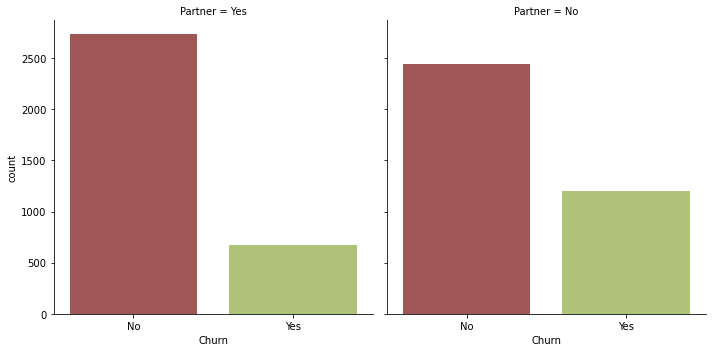

In [68]:
#comparing churn and partner

sns.catplot(x="Churn",col="Partner",data=df,kind='count',palette='tab20b_r')

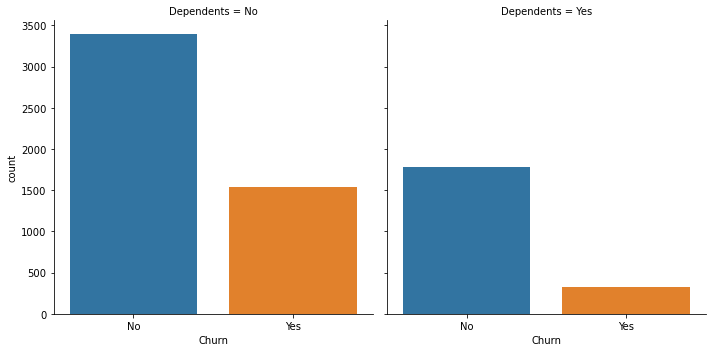

In [69]:
#checking churn level in dependendts

sns.catplot(x="Churn",col="Dependents",data=df,kind='count')

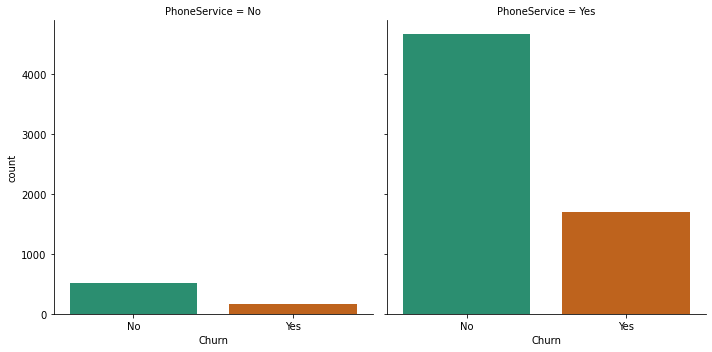

In [70]:
#checking churn in phone services

sns.catplot(x="Churn",col="PhoneService",data=df,kind='count',palette='Dark2')

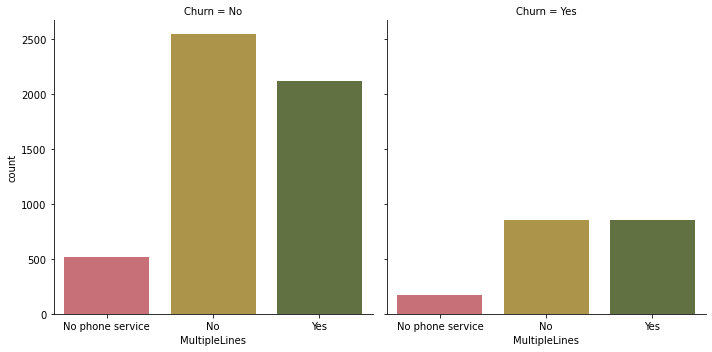

In [71]:
#checking churn in multiplelines

sns.catplot(x="MultipleLines",col="Churn",data=df,kind='count',palette='tab20b_r')

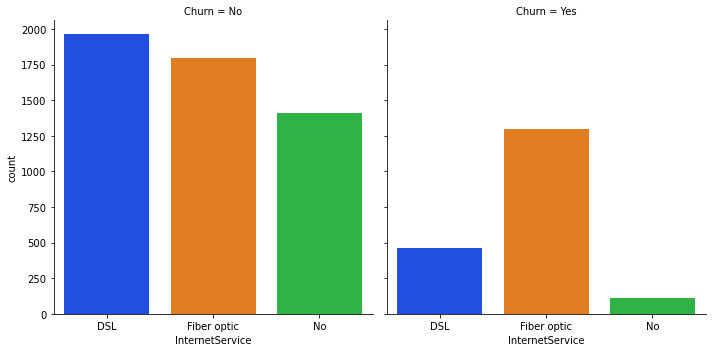

In [72]:
sns.catplot(x="InternetService",col="Churn",data=df,kind='count',palette='bright')

#Similarly we can check churn with other columns by catplot

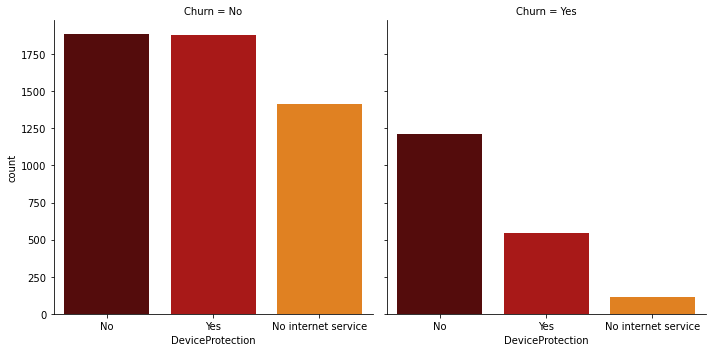

In [73]:
#checking churn level in device protection

sns.catplot(x="DeviceProtection",col="Churn",kind='count',data=df,palette="gist_heat")
plt.show()

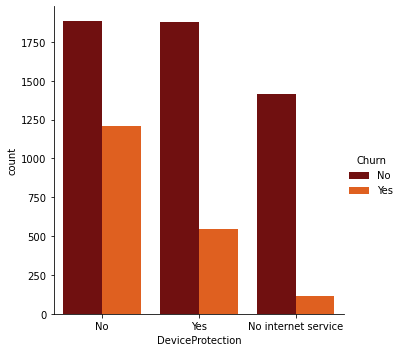

In [74]:
sns.catplot(x="DeviceProtection",hue="Churn",kind='count',data=df,palette="gist_heat")  #hue will give the additional variable in the same column
plt.show()

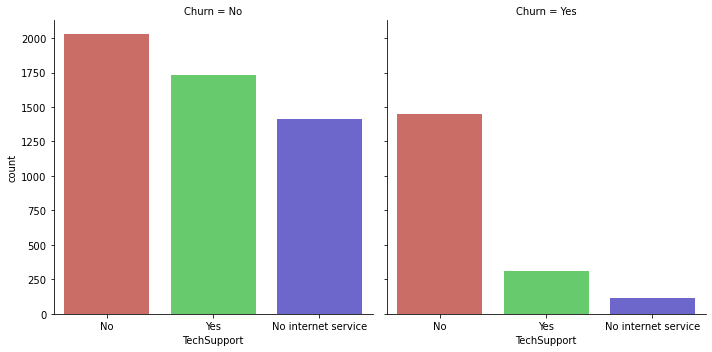

In [75]:
#checking churn level in techsupport

sns.catplot(x="TechSupport",col="Churn",kind='count',data=df,palette="hls")
plt.show()

### Multivariate Analysis

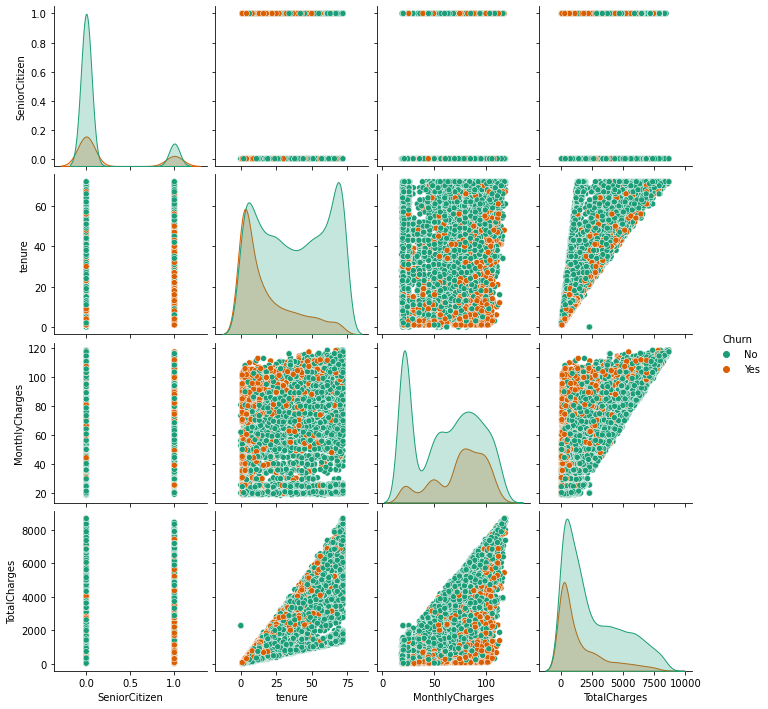

In [76]:
#Analysis of more than 2 columns
#will give analysis of all numerical columns  
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

### Checking for outliers

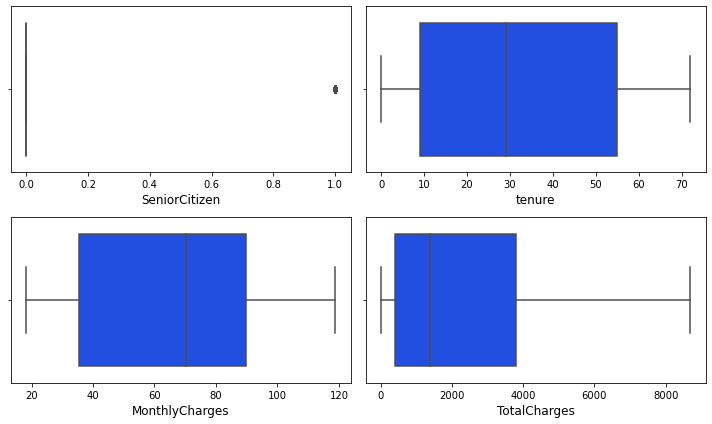

In [77]:
#By plotting boxplot

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette='bright')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=15)
    plotnumber+=1
plt.tight_layout()

#Here senior citizen has numeric values but is a categorical column so we do not have to remove outliers as we can check outliers only for numeric and continuous data

#The senior citizen column has outliers but it is a categorical column so no need to remove it and apart from this other columns have no outliers

### Checking for Skewness

In [78]:
#only on numerical columns

df.skew()

#here we see that senior citizen and total charges have skewness. since senior citizen is categorical no need to remove skewness and since total charges is continuous in nature lets use cube root to remove skewness. Skewness between -0.5 to 0.5 is normal ,highly skewed data has to be corrected to work upon any further

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

#We do not remove outliers from categorical data and from target variable(i.e. churn in this case). We do not check for skewness for categorical and target variables as we cannot takeout mean and median for categorical data.

### Removing Skewness

In [79]:
#using cube root method but we can use other methods as well like sqrt,log,box cox,power transform

df['TotalCharges']=np.cbrt(df['TotalCharges'])

In [80]:
#checking skewness again
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

#skewness is removed 

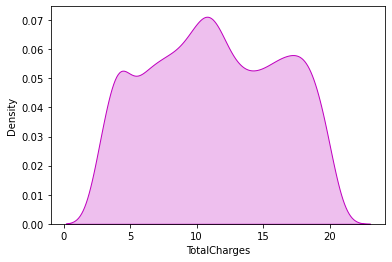

In [81]:
#lets visualize how the data has been distributed in Total Charges after removing skewness

sns.distplot(df['TotalCharges'],color='m',kde_kws={"shade":True},hist=False)
plt.show()

In [82]:
#This looks almost normal and skewness is also removed

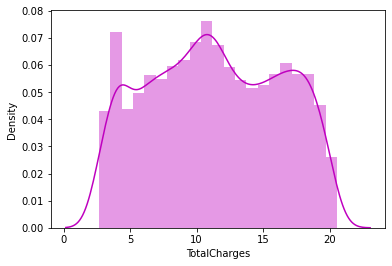

In [83]:
sns.distplot(df['TotalCharges'],color='m',hist=True)   #without kde_kws and hist=true
plt.show()

### Encoding Categorical columns

In [84]:
#Encoding categorical columns using Ordinal Encoder...there are many encoding techniques 
#Ordinal encoder is used to change the categorical columns into an integer value like 0 and 1 to make is more acessible to analysing

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1)) #fit_transform will fit the data which is df[i].values in the model and then transform it and reshape it in the int values. -1,1 stands for 1D array to be converted in 2D array with 1 column and as many rows as neede. number of rows -1 means its upto np to take the number of rows accd to the data
        
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


In [85]:
df.info()   #no object data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [86]:
df.describe()  #count of all the values is same i.e. there are no null values 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


### Correlation between target variable and independent variables

In [87]:
cor=df.corr()    #-1 represents highly negative correlation and +1 is highly positive correlation
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


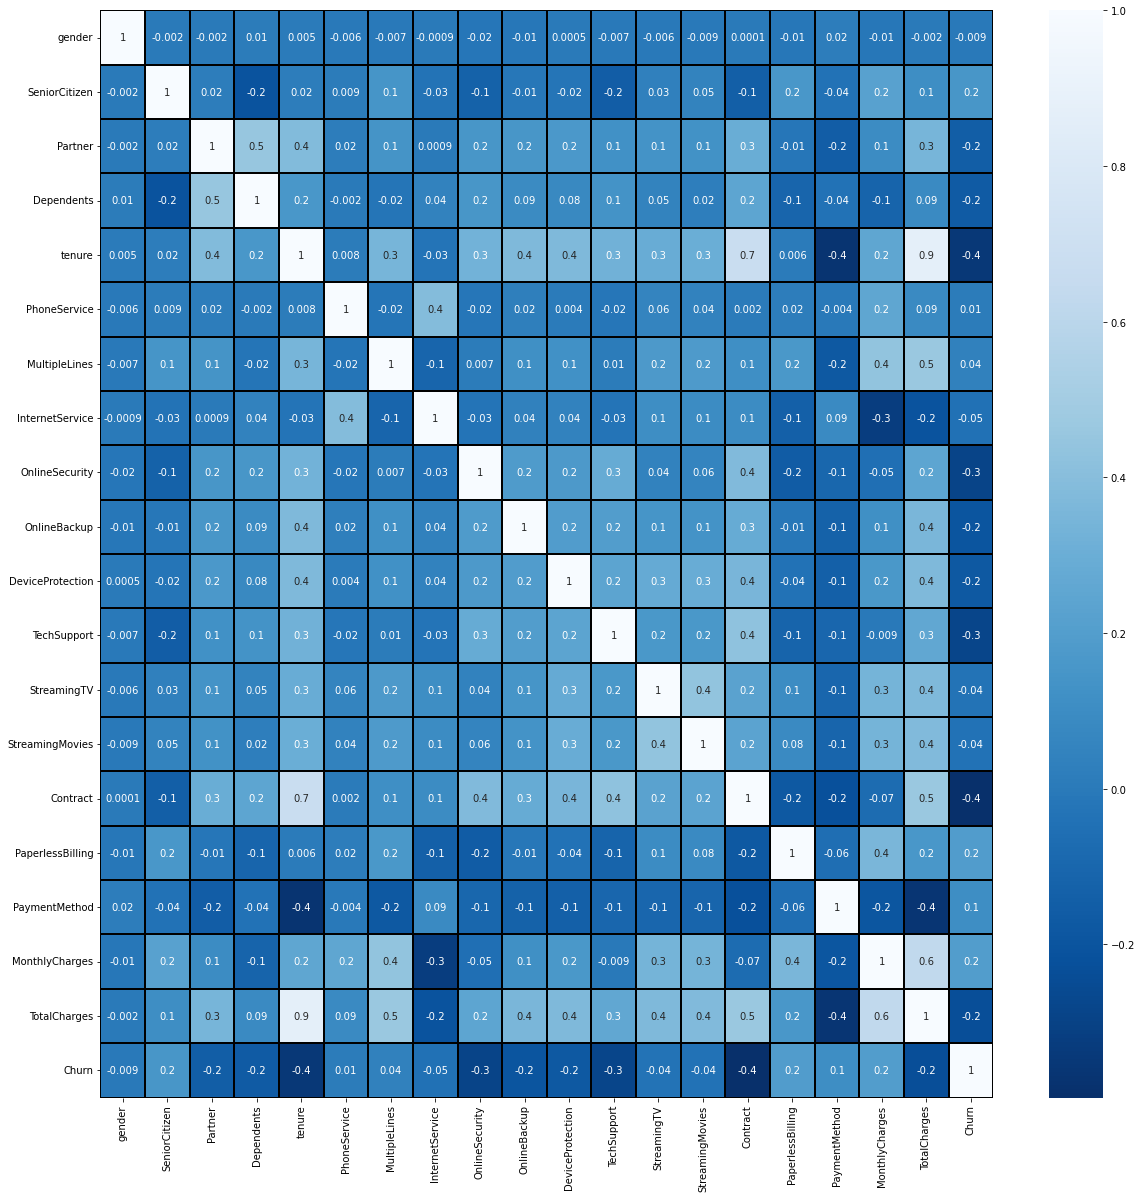

In [88]:
#We can visualize this by plotting a heatmap

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")   #annot=true is for the labelling on each square and fmt states how many values after decimal it should give
plt.yticks(rotation=0)
plt.show()

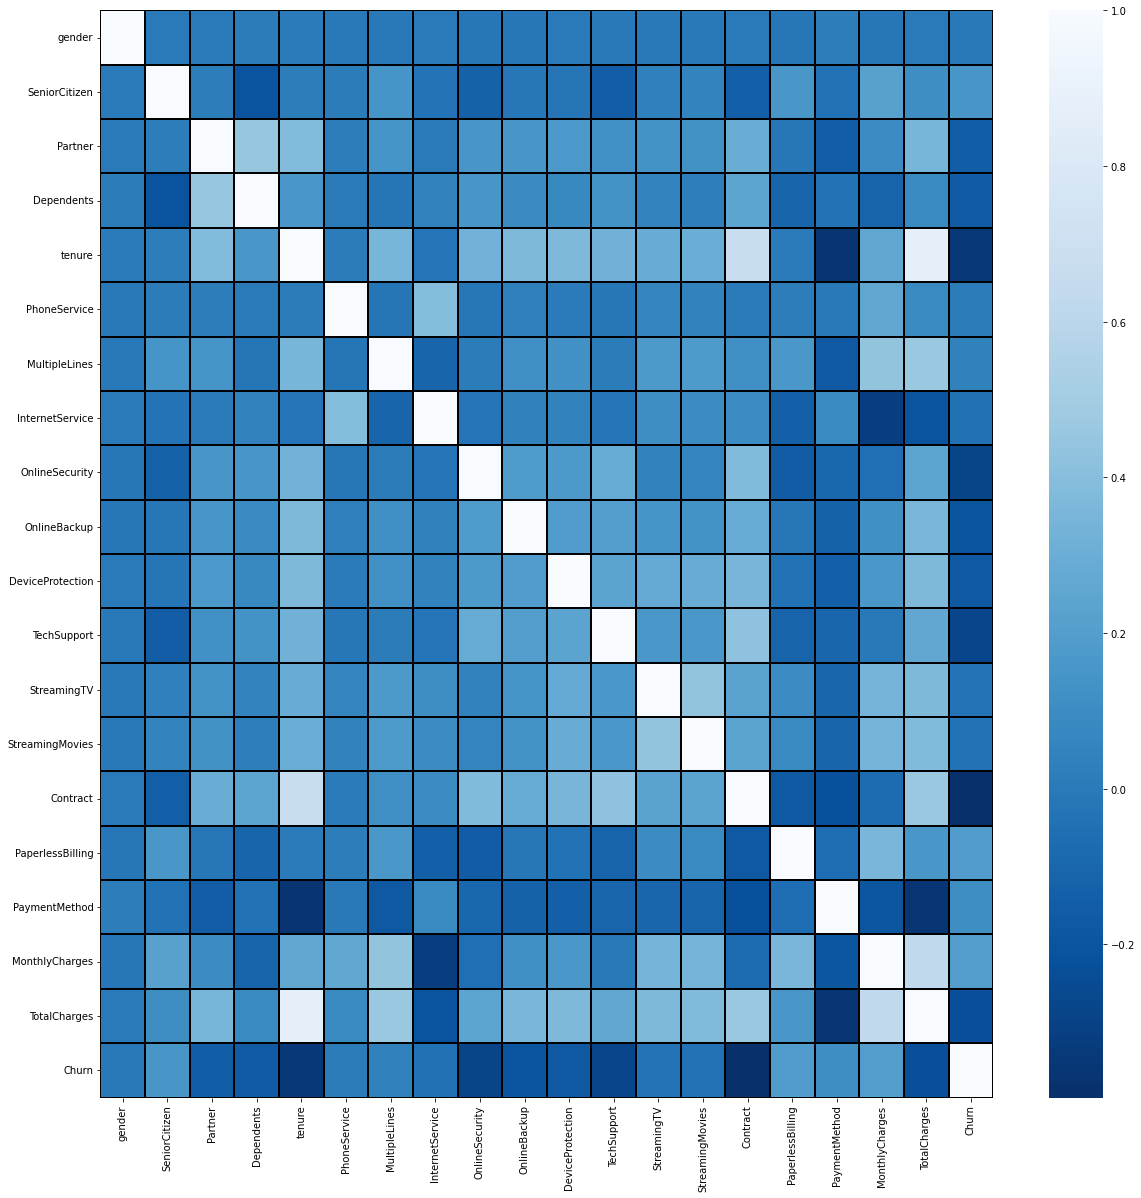

In [89]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=False,cmap="Blues_r")   #annot=true is for the labelling on each square
plt.show()

#Correlation understanding:
0--->no correlation
greater than -0.3 and greater than +0.3--->less correlation
greater than -0.5  and greater than +0.5--->moderate correlation
greater than -0.7  and greater than +0.7--->high correlation

In [90]:
#If there is very high correlation between some independent variables it creates multicoliniarity problen which leads to biasness in analysis
#Also the gender has very less correlation with the target variable so if we want we can drop it

In [91]:
df.corr()["Churn"].sort_values(ascending=False)   #arrange the correlation in descending order

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

### Visualizing the correlation between the label and other features using bar plot

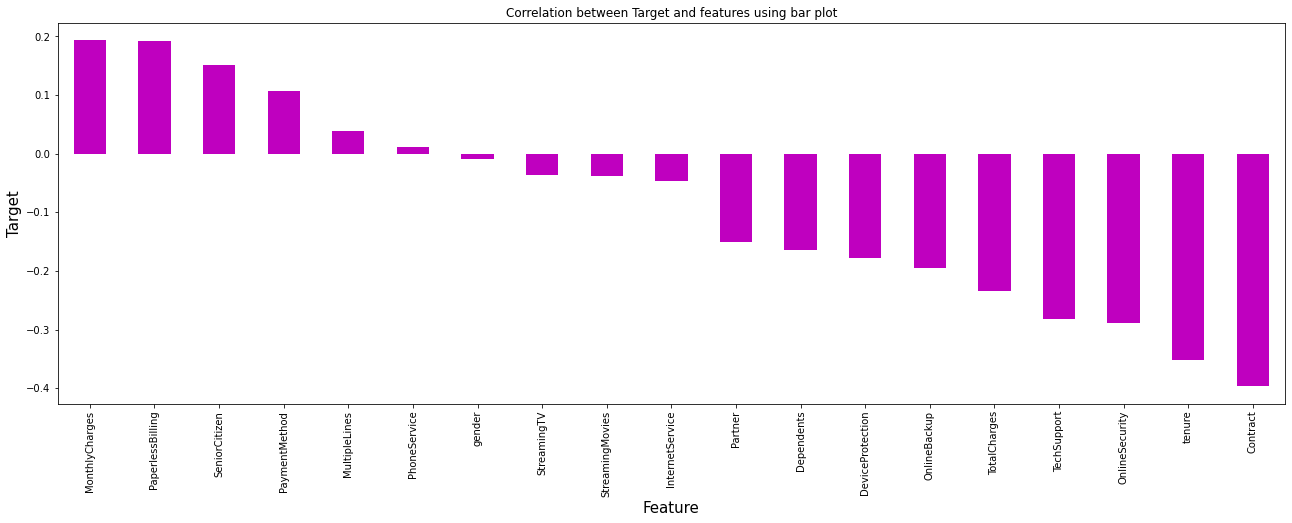

In [92]:
plt.figure(figsize=(22,7))
df.corr()["Churn"].sort_values(ascending=False).drop(["Churn"]).plot(kind='bar',color='m')   #drop[Churn] so that it does not show correlation with itself
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between Target and features using bar plot")
plt.show()

### Seperating Features(independent variables) and Label(Dependent or Target variable)

In [93]:
x=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [94]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066


### Feature scaling using Standard Scalarization

Feature scaling is a common technique used in machine learning to normalize the features of a dataset to ensure that each feature contributes equally to the model's performance. 

In [95]:
#There are many scalers we can use any
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)  #x is df without Churn
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


### Checking Variance Inflation Factor(VIF)

In [97]:
#Finding variance inflation factor in each scaled column i.e, s.shape[1] (1/(1-R**2))

#VIF is a method to reduce the multicollinearity between the dependent variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


#If VIF value is 1 or close to 1 it means that column has very less or no correlation with other columns and high VIF like in tenure states multicolliniarity with other columns. VIF till 5 is fine ...above that should be dropped preferabely specially above 10. So here we will drop the highest VIF column which is Total Charges

In [98]:
#Dropping Total Charges data

x.drop(["TotalCharges"],axis=1,inplace=True)

In [99]:
#Again checking vif to see if multicol#Dropping Total Charges data

x.drop(["TotalCharges"],axis=1,inplace=True)liniarity still exists

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


In [100]:
#Now the multicolliniarity of tenure column has reduced and now we can move ahead to model building

In [101]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

#Here we can see that data is not balance since there is classification problem and the model can give priority to higher data resulting in biased analysis. Now we weill balance the target variable data using oversampling method

### Oversampling

In [102]:
!pip install imblearn

In [1]:
#There are many methods we are using SMOTE here

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

NameError: name 'x' is not defined

In [104]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

In [105]:
#Now the data is balanced by the ratio of 1:1 ...now we can build machine learning Classification model

### Modelling

In [107]:
#Importing necessary libraries



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"at random_state",maxRS)


Best accuracy is 0.8666666666666667 at random_state 71


### Creating test and train split again

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

### Classification Algorithms

In [109]:
#Importing all the classification libraries

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

#### Random Forest Classifier

In [110]:
#Checking accuracy for Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8634460547504026
[[1337  225]
 [ 199 1344]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1562
         1.0       0.86      0.87      0.86      1543

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



#My accuracy for this model is 87%

#### Logistic Regression

In [111]:
#Checking accuracy for logistic regression model

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7900161030595814
[[1196  366]
 [ 286 1257]]
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      1562
         1.0       0.77      0.81      0.79      1543

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



#The accuracy using the Logistic Regression is 78.29%

#### Support Vector Machine Classifier

In [112]:
#Checking accuracy for support vector machine classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8161030595813205
[[1230  332]
 [ 239 1304]]
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81      1562
         1.0       0.80      0.85      0.82      1543

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



#### Gradient Boosting Classifier

In [113]:
#Checking accuracy for Gradient Boosting Classifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8524959742351047
[[1295  267]
 [ 191 1352]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1562
         1.0       0.84      0.88      0.86      1543

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



#### Ada Boost Classifier

In [114]:
#Checking accuracy for Ada Boost Classifier

ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8305958132045088
[[1251  311]
 [ 215 1328]]
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.83      1562
         1.0       0.81      0.86      0.83      1543

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



#### Bagging Classifier

In [115]:
#Checking accuracy for Bagging Classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8351046698872786
[[1325  237]
 [ 275 1268]]
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1562
         1.0       0.84      0.82      0.83      1543

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



#### ExtraTrees Classifier

In [116]:
#Checking accuracy for ExtraTrees Classifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8657004830917875
[[1333  229]
 [ 188 1355]]
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      1562
         1.0       0.86      0.88      0.87      1543

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



### Cross Validation Score

In [117]:
from sklearn.model_selection import cross_val_score

#Cross validation score is used to check the overfitting and underfitting problems. If cv=5 it means its a fold value i.e our data is divided into 5 equal parts and each part contains the randomly picked data. My model will check the performance 5 times. If not given any value by default cv=5. This will iterate the data 5 times and check the performance 5 times for which it will take n-1 i.e 4 folds for training data and remaining 1 fold for the test data. 

#Now we will check the cross validation score for every classifier model

In [118]:
#Checking cv score for Random Forest Classifier

score=cross_val_score(RFC,x,y) #Full syntax is cross_val_score(modelname,features(x),targetvariable(y),cv=foldvalue,scoring='accuracy')
print(score)  #this will print the score 5 times one for each fold
print(score.mean())   #will takeout the mean for all those 5 scores
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predRFC)-score.mean()) #This can help to identify whether the model is overfitting or underfitting the data. If the difference is large, it suggests that the model is overfitting, meaning that it is fitting too closely to the training data and not generalizing well to new data. If the difference is small,it is correct, it suggests that the model is underfitting, meaning that it is not fitting closely enough to the training data and may be missing important patterns.

[0.77391304 0.79371981 0.89082126 0.90140164 0.90961817]
0.8538947845233175
Difference between Accuracy score and Cross validation score is: 0.009551270227085129


#The difference between the accuracy score and the cross-validation score provides an estimate of the model's generalization performance on new data.







#We are using accuracy because:
in classification algorithms the default scorring parameter is accuracy
and in regression algorithms the default scorring parameter is r2score

In [119]:
#Checking cv score for Logistic Regression

score=cross_val_score(LR,x,y)  
print(score)
print(score.mean())   
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predLR)-score.mean()) 

[0.77004831 0.76183575 0.77487923 0.79168681 0.79652006]
0.7789940296486202
Difference between Accuracy score and Cross validation score is: 0.011022073410961175


In [120]:
#Checking cv score for Gradient Boosting Classifier

score=cross_val_score(GB,x,y)  
print(score)
print(score.mean())   
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predGB)-score.mean()) 

[0.75410628 0.77729469 0.86666667 0.88158531 0.88835186]
0.8336009601128227
Difference between Accuracy score and Cross validation score is: 0.018895014122282006


In [121]:
#Checking cv score for Support Vector Machine Classifier

score=cross_val_score(svc,x,y)  
print(score)
print(score.mean())   
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predsvc)-score.mean()) 

[0.78164251 0.77101449 0.82173913 0.81971967 0.83953601]
0.8067303628675431
Difference between Accuracy score and Cross validation score is: 0.009372696713777384


In [122]:
#Checking cv score for Ada Boosting Classifier

score=cross_val_score(ABC,x,y)  
print(score)
print(score.mean())   
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predABC)-score.mean()) 

[0.77198068 0.77246377 0.83140097 0.84823586 0.85161914]
0.8151400826089292
Difference between Accuracy score and Cross validation score is: 0.015455730595579587


In [123]:
#Checking cv score for Bagging Classifier

score=cross_val_score(BC,x,y)  
print(score)
print(score.mean())   
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predBC)-score.mean()) 

[0.73478261 0.75942029 0.8821256  0.87336878 0.89318511]
0.8285764786367892
Difference between Accuracy score and Cross validation score is: 0.0065281912504894235


In [129]:
#Checking cv score for Extra Trees Classifier

score=cross_val_score(ET,x,y)  
print(score)
print(score.mean())   

print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predET)-score.mean())

[0.80724638 0.81111111 0.89565217 0.90575157 0.91058482]
0.8660692112458351
Difference between Accuracy score and Cross validation score is: -0.00036872815404764836


#Here the Extra Tress Classifier is the best performing model because the Difference between Accuracy score and Cross validation score is the least here.

### Hyper Parameter Tuning

In [130]:
!pip install sklearn.model

In [131]:
#Extra Trees Classifier

from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
           'random_state': [10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}   #It uses a grid of parameters to check the tuning 

In [132]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)  #By default cv=5

In [133]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [134]:
GCV.best_params_  #Gives the best parameters of the hyper parameter tuning for the Extra trees classifier

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [135]:
Final_model=ExtraTreesClassifier(criterion='entropy',max_depth=20,n_estimators=300,n_jobs=-2,random_state=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.98872785829307


#Though it is not mandatory that after the hyper parameter tuning the data accuracy will improve. If the model is not maximizing its performance use more parameters for hyper parameter tuning.Can check parameters on google on official website of extra trees classifier.scikitlearn. Likeways every algorithm has different parameters.

### Plotting ROC and comparing AUC for all models used

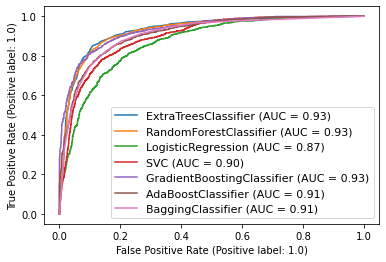

In [136]:
#Plotting for all the models used here

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve


disp=plot_roc_curve(ET,x_test,y_test)
plot_roc_curve(RFC,x_test,y_test,ax=disp.ax_)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(GB,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ABC,x_test,y_test,ax=disp.ax_)
plot_roc_curve(BC,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### Plotting ROC and compare AUC for the best model

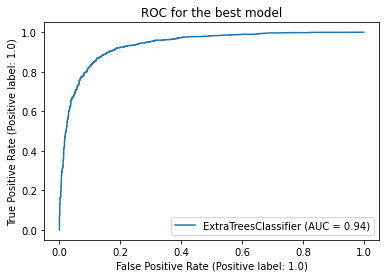

In [137]:
plot_roc_curve(Final_model,x_test,y_test)
plt.title("ROC for the best model")
plt.show()

#here we have plotted the roc curve for the best model i.e the final model after hyper parameter tuning and the AUC value is 94%

#### Saving the model

In [138]:
#Saving the model using .pkl

import joblib
joblib.dump(Final_model,"Telecom_Customer_Churn_Analysis.pkl")

['Telecom_Customer_Churn_Analysis.pkl']

#### Predicting the saved model

In [139]:
#Lets load the saved model and get the predictions

model=joblib.load("Telecom_Customer_Churn_Analysis.pkl")


#Prediction
prediction=model.predict(x_test)
prediction

array([0., 0., 0., ..., 1., 1., 1.])

#These are the predicted churned values of the customer

#### One More method to plot the AUC ROC curve

In [143]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


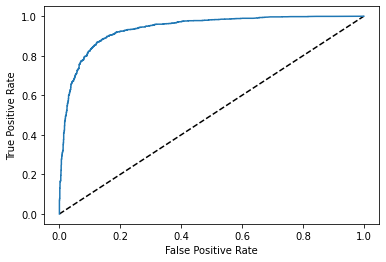

AUC score: 
 0.8700518968403005


In [144]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="RandomForestClassifier(area=%0.2f)"% roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print("AUC score:","\n",auc_score)